In [2]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import Markdown as md
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
def day(n):
    return datetime(2020, 2, 3) + timedelta(n)

In [4]:
rundf = pd.read_csv('results/'+
        'SIsaR_0.9.5.2 experiments 2 seeds-table_1000_basic_control_schoolOnSept.csv',
                    sep=',',skiprows=6)
case="# 1000 epidemics with non-pharmaceutical containment measures, "+\
          "schools open in Sep, changing world"
md(case)

# 1000 epidemics with non-pharmaceutical containment measures, schools open in Sep, changing world

In [4]:
rundf["totalInfected"]=rundf["cumulativeRedCount"]+rundf["cumulativeVioletCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]

In [5]:
rundf.columns

Index(['[run number]', 'run#', '[step]', 'seed0', 'seed', 'cp1cRed',
       'cp1cRedNH', 'cp1cViolet', 'cp1cVioletNH', 'cp1cDead', 'cp2cRed',
       'cp2cRedNH', 'cp2cViolet', 'cp2cVioletNH', 'cp2cDead', 'cp3cRed',
       'cp3cRedNH', 'cp3cViolet', 'cp3cVioletNH', 'cp3cDead', 'cp4cRed',
       'cp4cRedNH', 'cp4cViolet', 'cp4cVioletNH', 'cp4cDead', 'cp5cRed',
       'cp5cRedNH', 'cp5cViolet', 'cp5cVioletNH', 'cp5cDead', 'cp6cRed',
       'cp6cRedNH', 'cp6cViolet', 'cp6cVioletNH', 'cp6cDead',
       'cumulativeRedCount', 'cumulativeVioletCount', 'cumulativeDeadCount',
       'ticks', 'TinfSch', 'SinfSch', 'TinfNotSch', 'SinfNotSch',
       'totalInfected', 'totalInfected&Deceased'],
      dtype='object')

In [6]:
rundf.replace(-1, np.nan, inplace=True)

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,960.00,1000.00,1000.00,1000.00
mean,1.92,65.79,197.09,154.66
std,4.63,96.59,312.54,117.81
min,0.00,0.00,2.00,23.00
25%,0.00,4.00,13.00,80.00
50%,0.00,16.50,33.50,103.00
75%,0.00,74.00,194.00,186.50
max,27.00,377.00,1107.00,609.00


In [9]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [10]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &   ticks \\
\midrule
count &     960.00 &             1000.00 &                 1000.00 & 1000.00 \\
mean  &       1.92 &               65.79 &                  197.09 &  154.66 \\
std   &       4.63 &               96.59 &                  312.54 &  117.81 \\
min   &       0.00 &                0.00 &                    2.00 &   23.00 \\
25\%   &       0.00 &                4.00 &                   13.00 &   80.00 \\
50\%   &       0.00 &               16.50 &                   33.50 &  103.00 \\
75\%   &       0.00 &               74.00 &                  194.00 &  186.50 \\
max   &      27.00 &              377.00 &                 1107.00 &  609.00 \\
\bottomrule
\end{tabular}



The output is included within:  
\begin{table}[htbp] or [H]

... output above ...

\label{a label}  
\caption{a caption}  
\end{table}


## 1 simulation time

array([[<AxesSubplot:title={'center':'ticks'}>]], dtype=object)

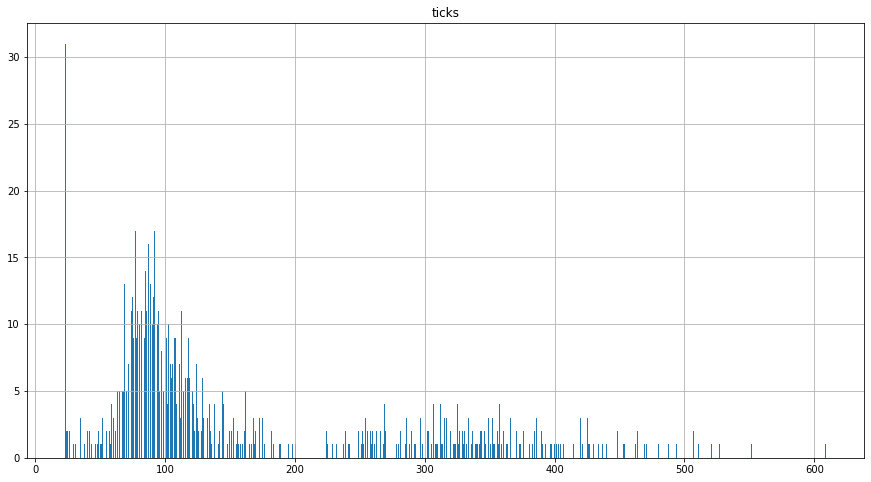

In [11]:
rundf.hist(column="ticks",bins=1000,figsize=(15,8))

## 2 symptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'cumulativeRedCount'}>]],
      dtype=object)

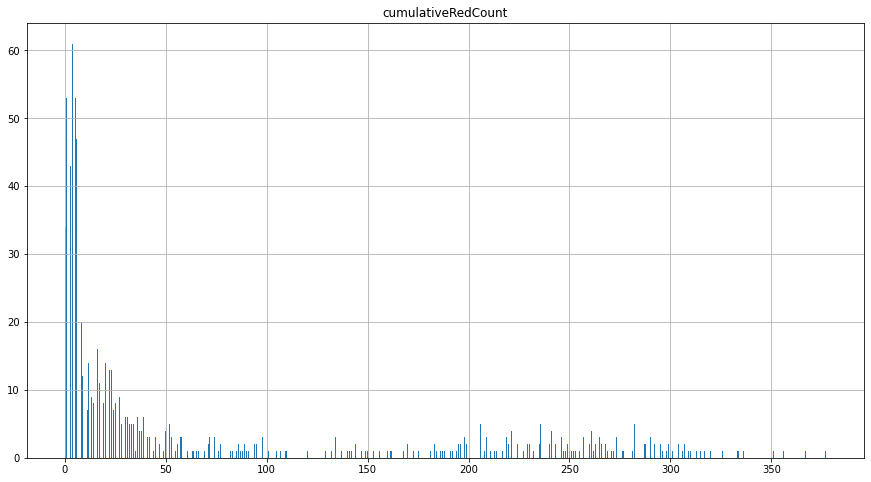

In [12]:
rundf.hist(column="cumulativeRedCount",bins=1000,figsize=(15,8))

## 3 symptomatic agent cumulative count vs. time 

<AxesSubplot:title={'center':'symptomatic agent cumulative count vs. time'}, xlabel='ticks', ylabel='cumulativeRedCount'>

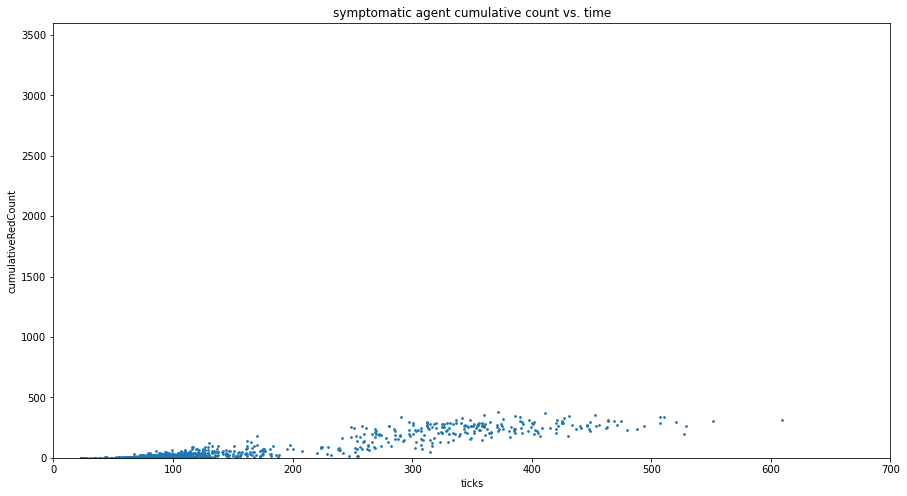

In [13]:
rundf.plot(x="ticks",y="cumulativeRedCount",s=3,kind='scatter',figsize=(15,8), 
           title="symptomatic agent cumulative count vs. time",
           ylim=(0,3600),xlim=(0,700))

## 4 symptomatic + asymptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected'}>]], dtype=object)

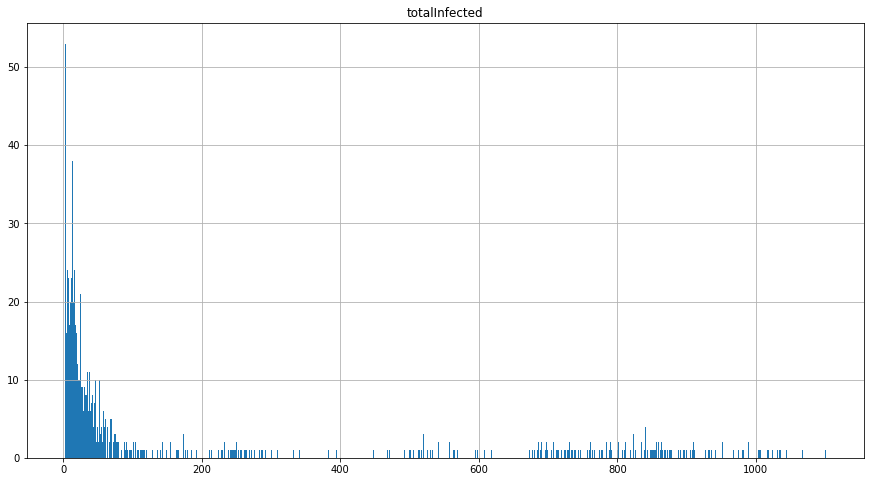

In [14]:
rundf.hist(column="totalInfected",bins=1000,figsize=(15,8))

## 5 total number of deceased

array([[<AxesSubplot:title={'center':'cumulativeDeadCount'}>]],
      dtype=object)

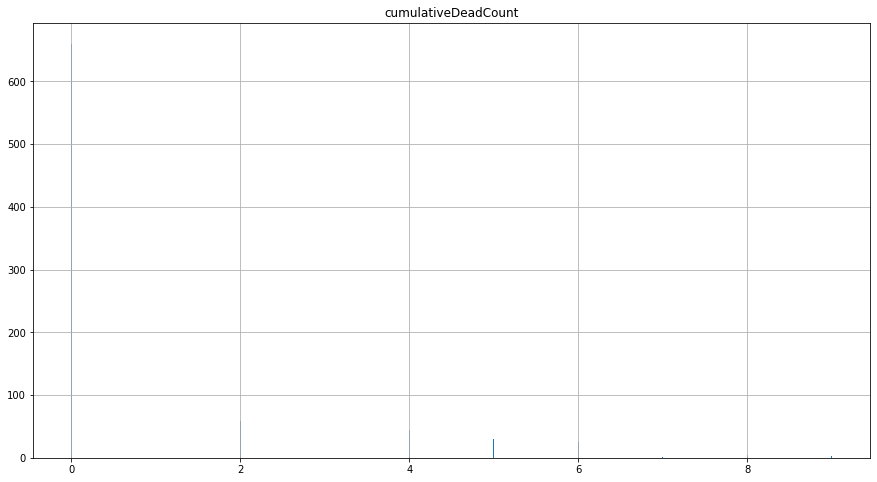

In [15]:
rundf.hist(column="cumulativeDeadCount",bins=1000,figsize=(15,8))

## 6 symptomatic + asymptomatic + deceased agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected&Deceased'}>]],
      dtype=object)

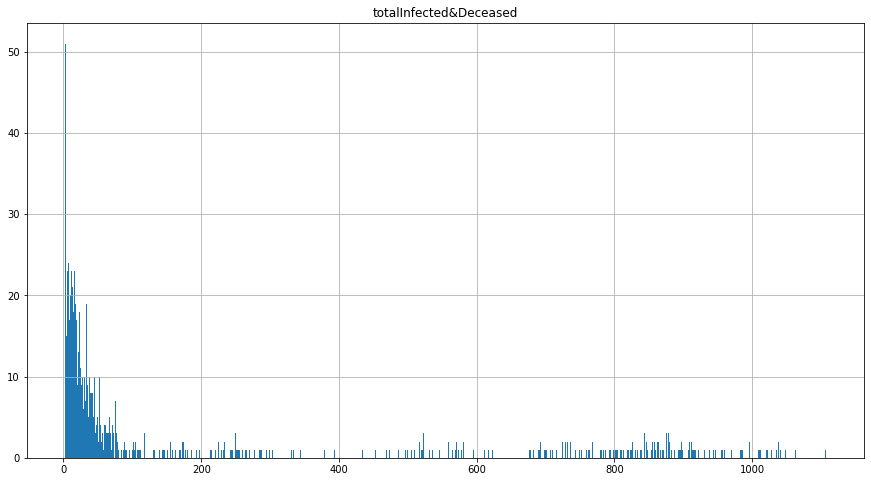

In [16]:
rundf.hist(column="totalInfected&Deceased",bins=1000,figsize=(15,8))

## 7 symptomatic + asymptomatic + deceased agent cumulative count vs. time

<AxesSubplot:title={'center':'simptomatic+asymptomatic+deceased vs. time'}, xlabel='ticks', ylabel='totalInfected&Deceased'>

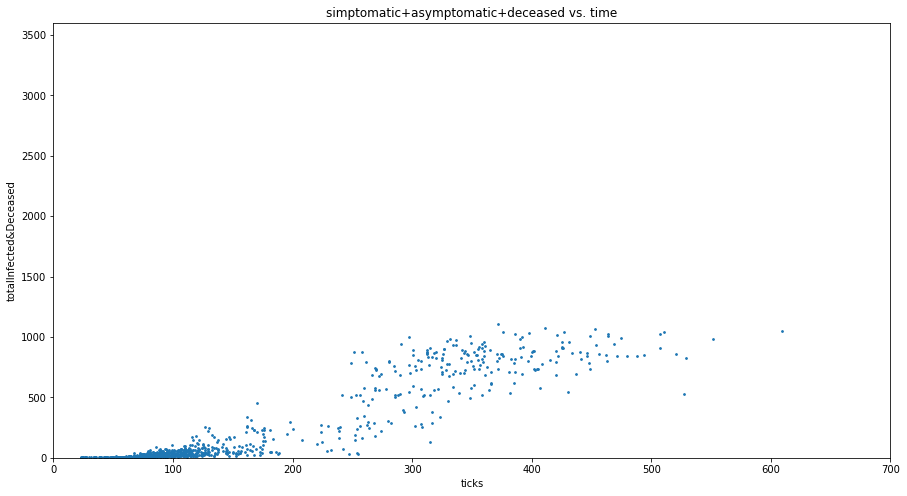

In [17]:
rundf.plot(x="ticks",y="totalInfected&Deceased",s=3,kind='scatter',figsize=(15,8), 
           title="simptomatic+asymptomatic+deceased vs. time",ylim=(0,3600),xlim=(0,700))

In [18]:
md("# --------------------------------------------------------\n"+\
    "# Time Function displaying heat-maps\n"+\
  "# --------------------------------------------------------")

# --------------------------------------------------------
# Time Function displaying heat-maps
# --------------------------------------------------------

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

def timeFunction(day0,day1,title):
    
    rundfHere=rundf[rundf.ticks>=day0]
    rundfHere=rundfHere[rundfHere.ticks<=day1]
    
    display(md ("## Epidemics with duration between {} days ({}) and {} days ({})"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"))) )
    
    
    rundfHere.rename(columns={'cumulativeRedCount': 'symptomatic',
                              'ticks':"duration"},inplace=True)
    
    tmp=rundfHere[['symptomatic','totalInfected&Deceased','duration']].describe();
    display(tmp)
    display(print(tmp.to_latex()))
    
    if rundfHere.shape[0] == 0: return
    
    for nBins in [10,20,30,60]:
        display(md ("## Epidemics with duration between {} days ({}) and {} days ({}), with {} bins"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"),nBins)) )
            
        rundfHere['totalInfected&Deceased'].plot.hist(bins=nBins, color="r",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()
        rundfHere['duration'].plot.hist(bins=nBins, color="g",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()

        # preparing data for the heat-map
        hist = plt.hist2d(x=rundfHere['duration'], y=rundfHere['totalInfected&Deceased'], 
                          bins=nBins, range=[[0, 700], [0, 3600]])
        plt.close() #to avoid the output of hist2d
        
        zMax=np.amax(hist[0]) # max level z axis
        display(md ("With {} bins, the max value on z axis is {}, first row is {}"\
                    .format(nBins,zMax,np.transpose(hist[0])[0])))
        
        if nBins == 60: plt.figure(figsize=(20,10))
        else:           plt.figure(figsize=(8.5,4.25))
        
        lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
        ax = sns.heatmap(
            np.flip(np.transpose(hist[0]),0), 
            #robust=True, 
            norm=lognorm,
            cmap='YlGnBu',
            annot=True, fmt='.0f', 
            xticklabels=np.round(hist[1][1:],0).astype(int),
            yticklabels=np.flip(hist[2][1:],0).astype(int),
            annot_kws={"size":8}
            )

        plt.xlabel("Days")
        plt.ylabel("Total symptomatic + asymptomatic + deceased")

        plt.title(title)

        plt.show()


## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30)

,symptomatic,totalInfected&Deceased,duration
count,1000.00,1000.00,1000.00
mean,65.79,197.09,154.66
std,96.59,312.54,117.81
min,0.00,2.00,23.00
25%,4.00,13.00,80.00
50%,16.50,33.50,103.00
75%,74.00,194.00,186.50
max,377.00,1107.00,609.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &      1000.00 &                 1000.00 &   1000.00 \\
mean  &        65.79 &                  197.09 &    154.66 \\
std   &        96.59 &                  312.54 &    117.81 \\
min   &         0.00 &                    2.00 &     23.00 \\
25\%   &         4.00 &                   13.00 &     80.00 \\
50\%   &        16.50 &                   33.50 &    103.00 \\
75\%   &        74.00 &                  194.00 &    186.50 \\
max   &       377.00 &                 1107.00 &    609.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 10 bins

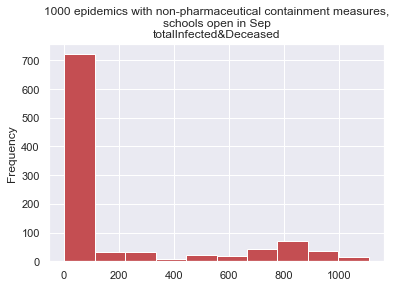

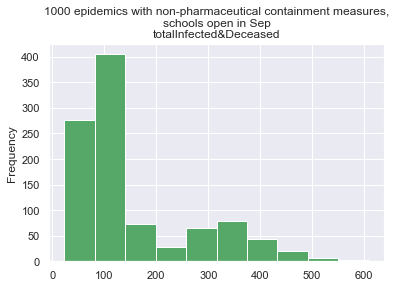

With 10 bins, the max value on z axis is 534.0, first row [147. 534.  74.  28.   8.   0.   0.   0.   0.   0.]

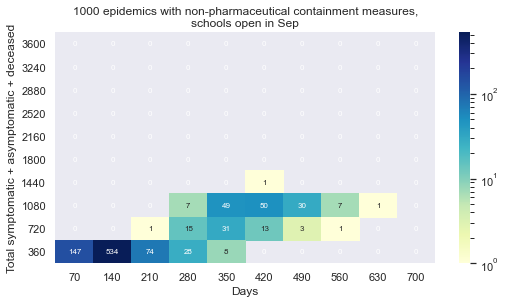

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 20 bins

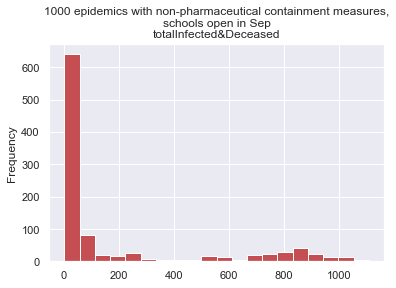

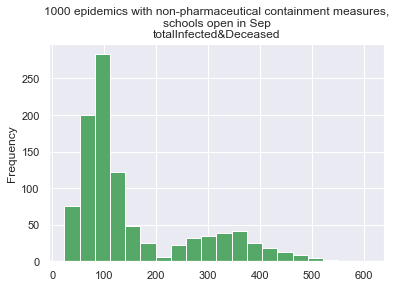

With 20 bins, the max value on z axis is 369.0, first row [ 45. 102. 369. 160.  45.  12.   6.   6.   0.   1.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]

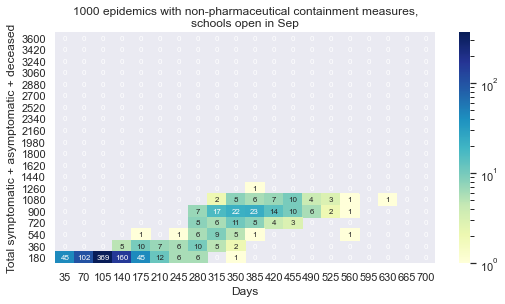

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 30 bins

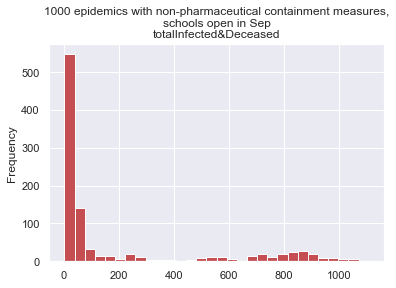

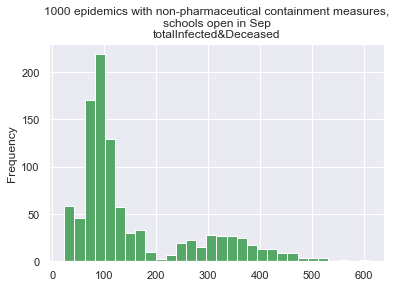

With 30 bins, the max value on z axis is 282.0, first row [ 31.  36.  80. 282. 168.  72.  30.  16.   2.   3.   4.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]

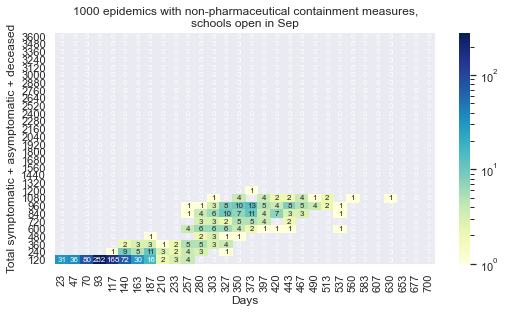

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 60 bins

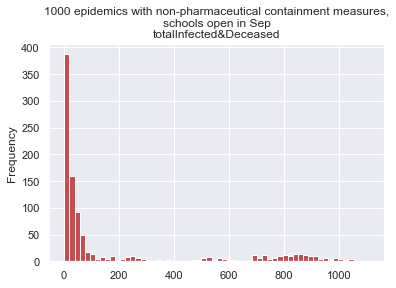

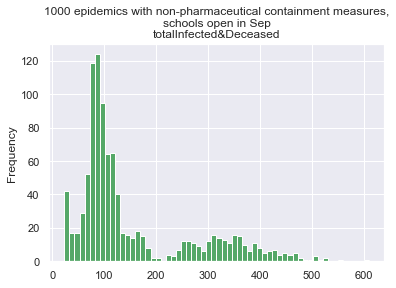

With 60 bins, the max value on z axis is 148.0, first row [  0.  31.  14.  22.  25.  55. 128. 148.  79.  61.  36.  11.  11.   9.
   5.   4.   2.   0.   0.   1.   0.   3.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.]

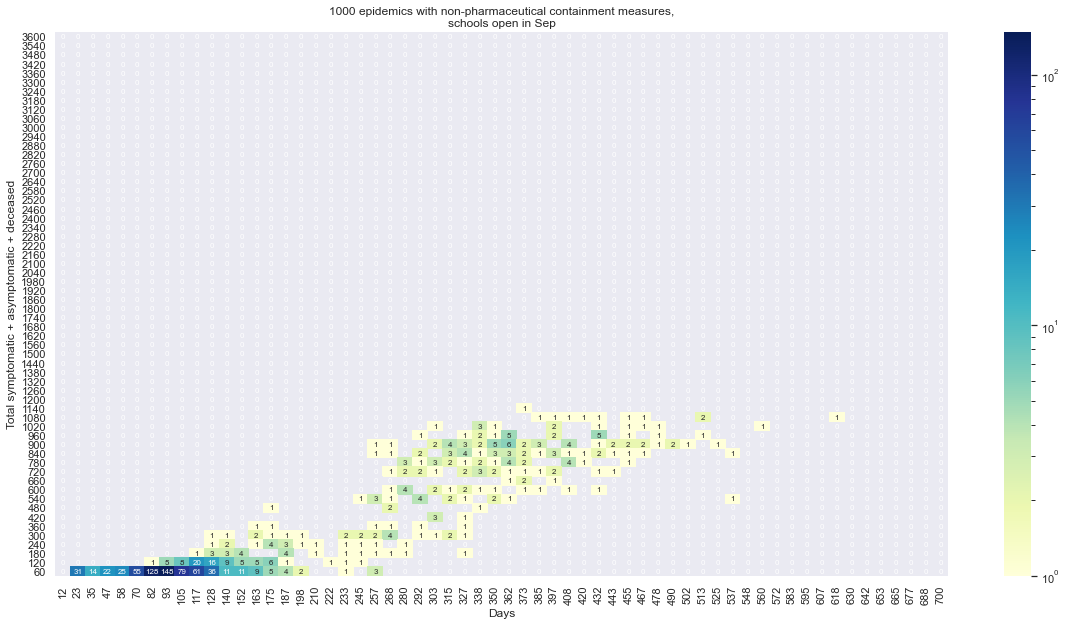

In [20]:
timeFunction(0,1000,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31)

,symptomatic,totalInfected&Deceased,duration
count,756.00,756.00,756.00
mean,16.61,36.14,93.25
std,21.44,48.62,34.81
min,0.00,2.00,23.00
25%,3.00,10.00,74.00
50%,7.00,19.50,89.50
75%,22.25,42.00,112.00
max,184.00,453.00,208.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       756.00 &                  756.00 &    756.00 \\
mean  &        16.61 &                   36.14 &     93.25 \\
std   &        21.44 &                   48.62 &     34.81 \\
min   &         0.00 &                    2.00 &     23.00 \\
25\%   &         3.00 &                   10.00 &     74.00 \\
50\%   &         7.00 &                   19.50 &     89.50 \\
75\%   &        22.25 &                   42.00 &    112.00 \\
max   &       184.00 &                  453.00 &    208.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 10 bins

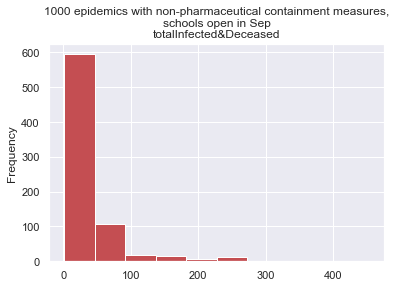

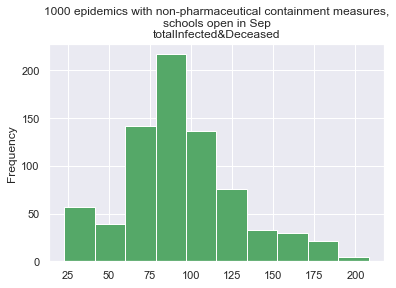

With 10 bins, the max value on z axis is 534.0, first row [147. 534.  74.   0.   0.   0.   0.   0.   0.   0.]

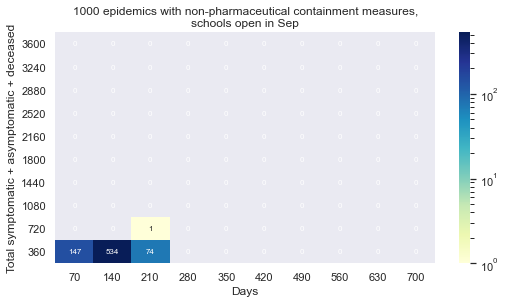

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 20 bins

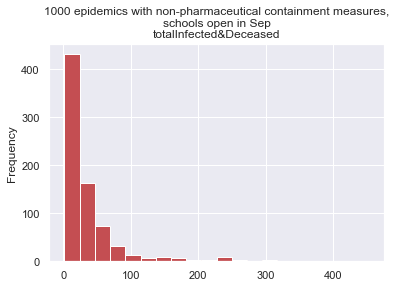

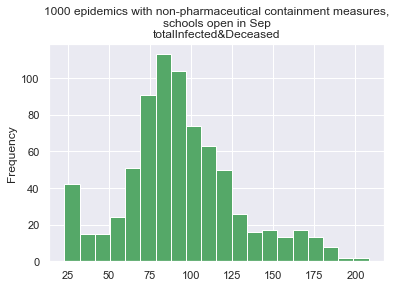

With 20 bins, the max value on z axis is 369.0, first row [ 45. 102. 369. 160.  45.  12.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]

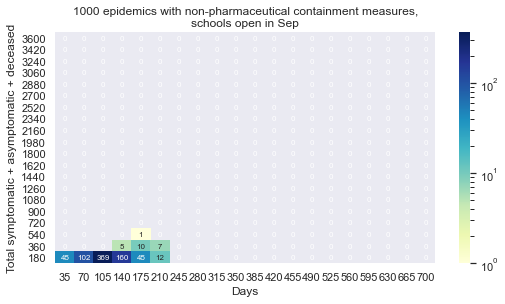

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 30 bins

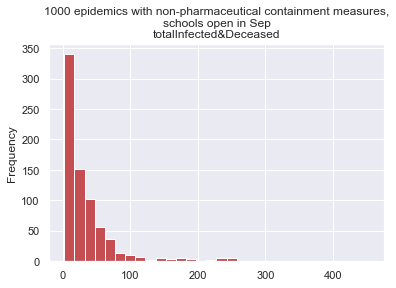

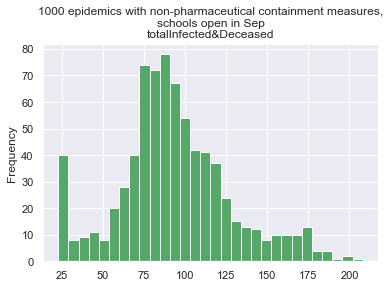

With 30 bins, the max value on z axis is 282.0, first row [ 31.  36.  80. 282. 168.  72.  30.  16.   2.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]

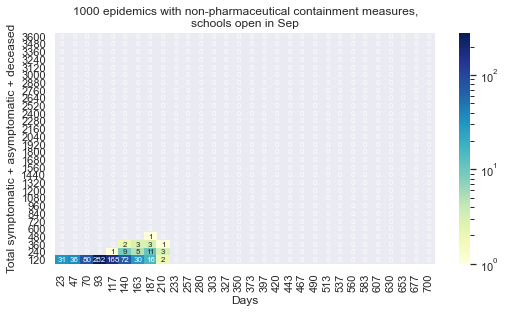

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 60 bins

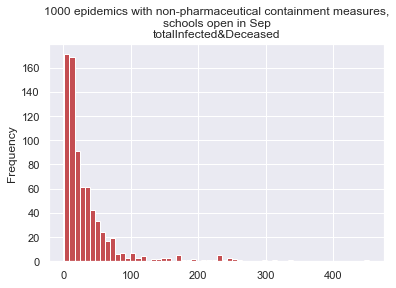

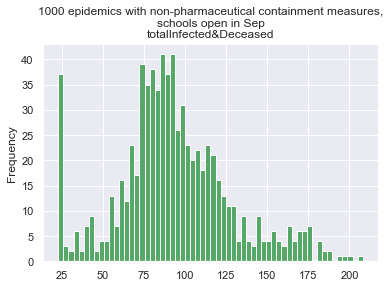

With 60 bins, the max value on z axis is 148.0, first row [  0.  31.  14.  22.  25.  55. 128. 148.  79.  61.  36.  11.  11.   9.
   5.   4.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.]

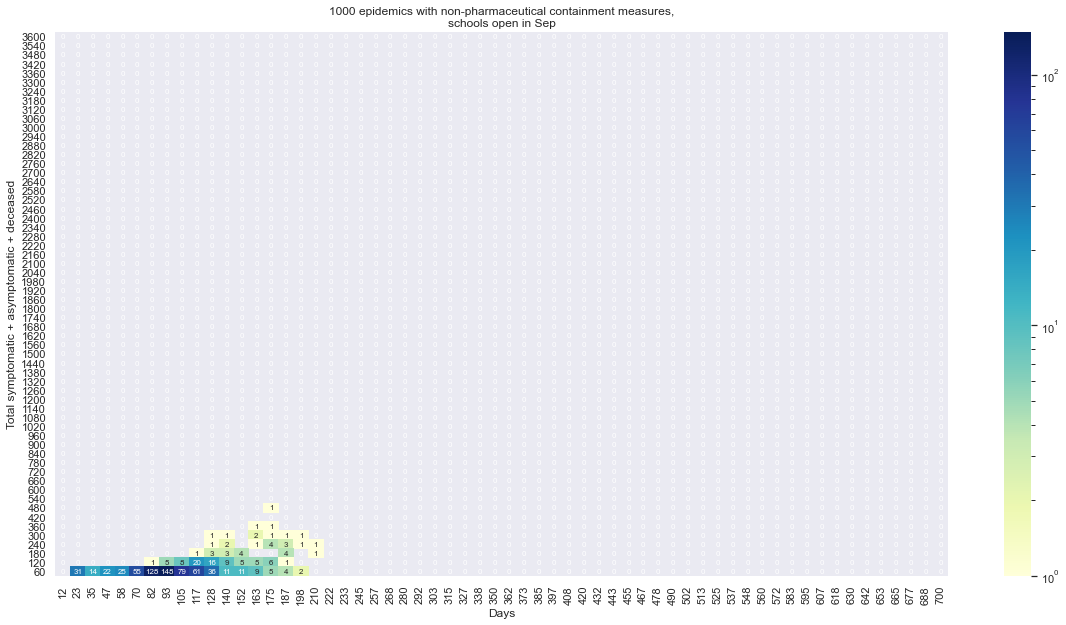

In [21]:
timeFunction(0,210,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31)

,symptomatic,totalInfected&Deceased,duration
count,207.00,207.00,207.00
mean,207.32,661.67,322.81
std,78.29,255.11,51.24
min,13.00,34.00,220.00
25%,159.00,521.00,281.00
50%,221.00,734.00,325.00
75%,265.00,855.00,360.00
max,377.00,1107.00,422.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       207.00 &                  207.00 &    207.00 \\
mean  &       207.32 &                  661.67 &    322.81 \\
std   &        78.29 &                  255.11 &     51.24 \\
min   &        13.00 &                   34.00 &    220.00 \\
25\%   &       159.00 &                  521.00 &    281.00 \\
50\%   &       221.00 &                  734.00 &    325.00 \\
75\%   &       265.00 &                  855.00 &    360.00 \\
max   &       377.00 &                 1107.00 &    422.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 10 bins

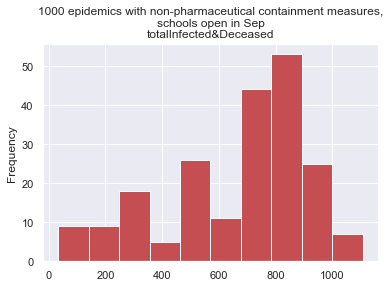

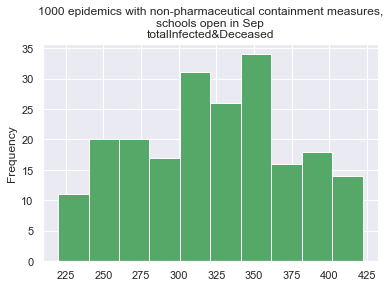

With 10 bins, the max value on z axis is 50.0, first row [ 0.  0.  0. 28.  8.  0.  0.  0.  0.  0.]

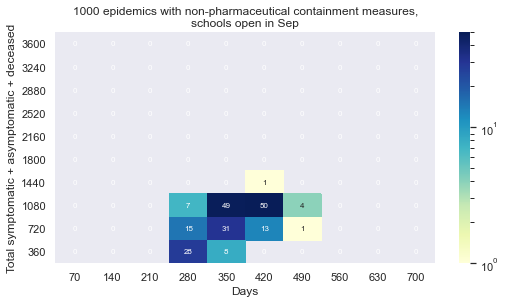

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 20 bins

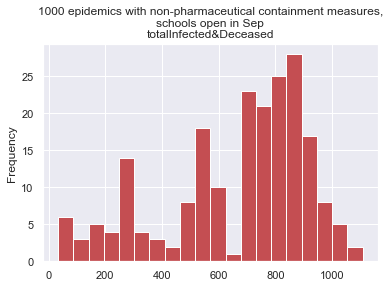

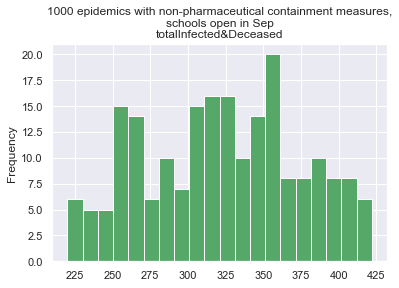

With 20 bins, the max value on z axis is 23.0, first row [0. 0. 0. 0. 0. 0. 6. 6. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

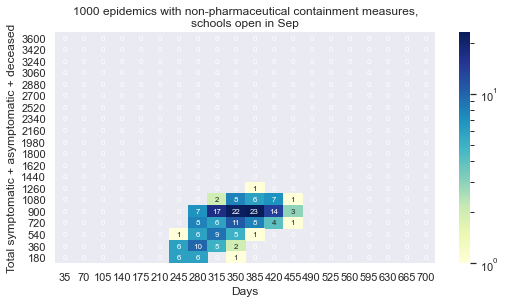

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 30 bins

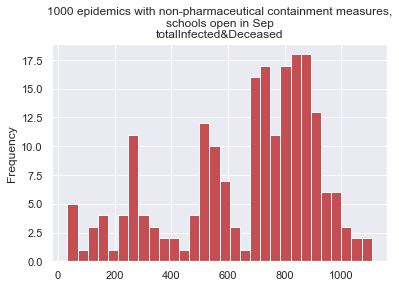

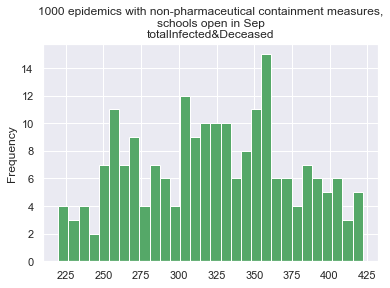

With 30 bins, the max value on z axis is 13.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

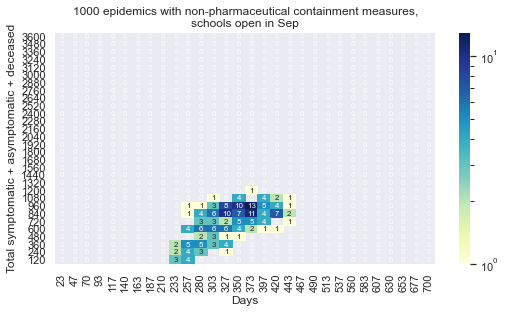

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 60 bins

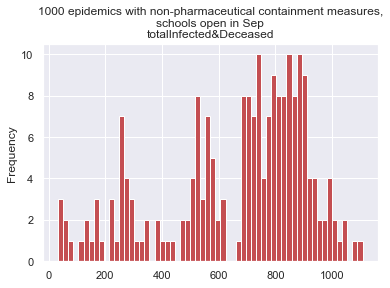

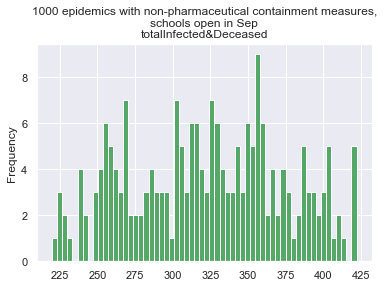

With 60 bins, the max value on z axis is 6.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

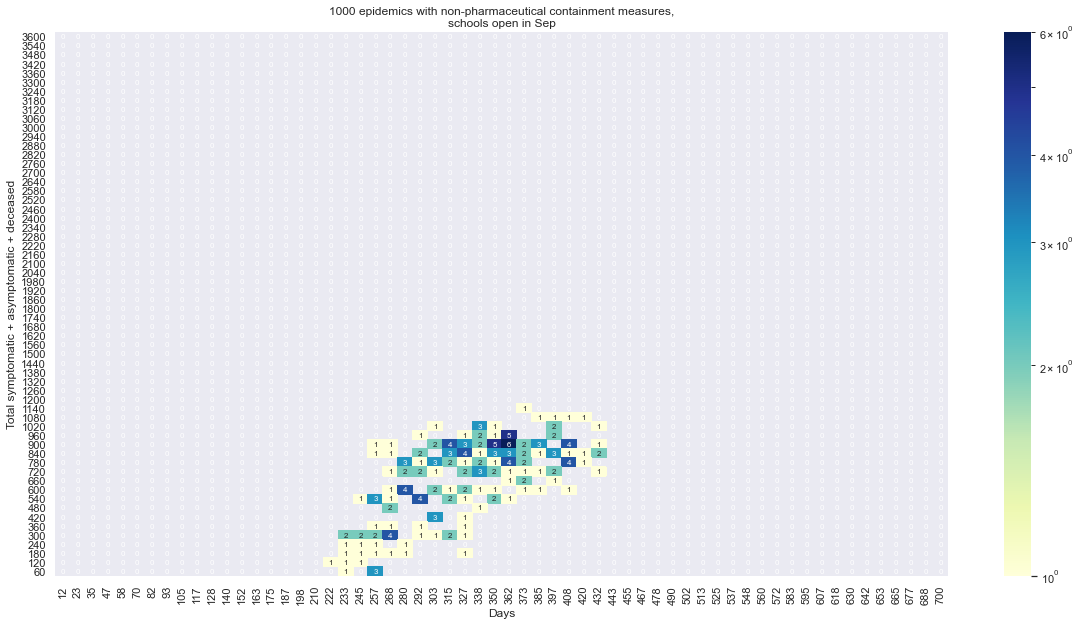

In [22]:
timeFunction(211,422,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30)

,symptomatic,totalInfected&Deceased,duration
count,37.00,37.00,37.00
mean,278.76,886.38,468.51
std,40.29,123.71,41.26
min,181.00,532.00,425.00
25%,257.00,844.00,440.00
50%,275.00,875.00,456.00
75%,304.00,986.00,488.00
max,356.00,1063.00,609.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &        37.00 &                   37.00 &     37.00 \\
mean  &       278.76 &                  886.38 &    468.51 \\
std   &        40.29 &                  123.71 &     41.26 \\
min   &       181.00 &                  532.00 &    425.00 \\
25\%   &       257.00 &                  844.00 &    440.00 \\
50\%   &       275.00 &                  875.00 &    456.00 \\
75\%   &       304.00 &                  986.00 &    488.00 \\
max   &       356.00 &                 1063.00 &    609.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 10 bins

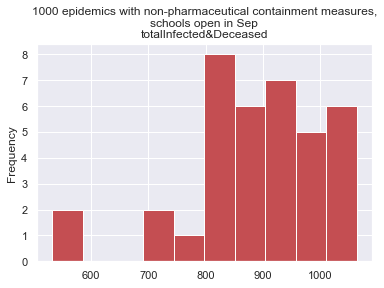

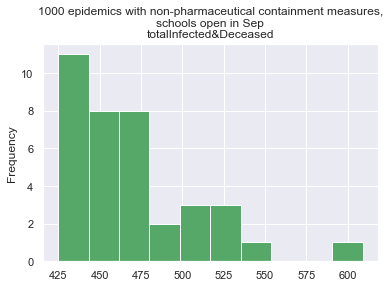

With 10 bins, the max value on z axis is 26.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

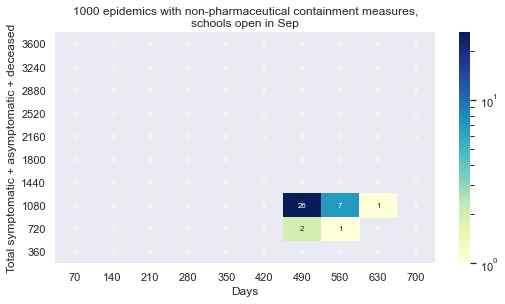

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 20 bins

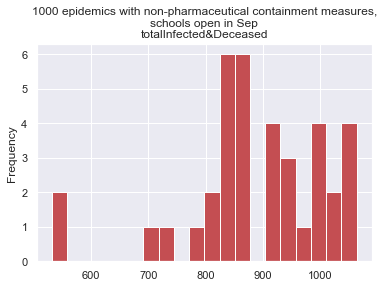

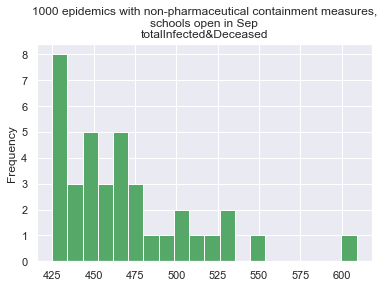

With 20 bins, the max value on z axis is 9.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

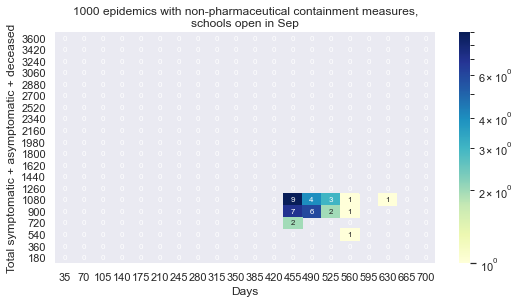

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 30 bins

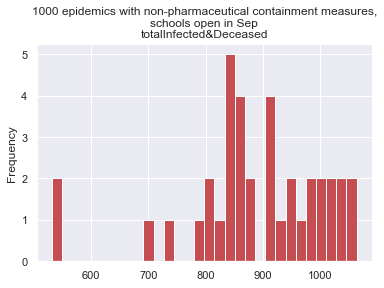

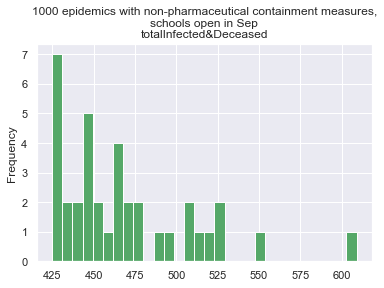

With 30 bins, the max value on z axis is 7.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

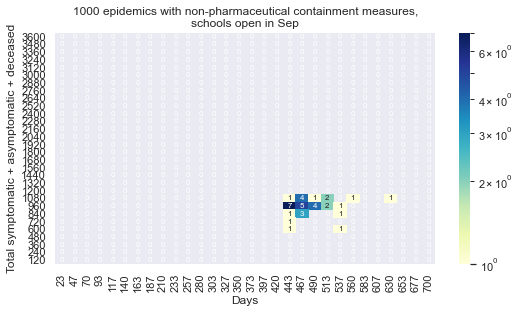

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 60 bins

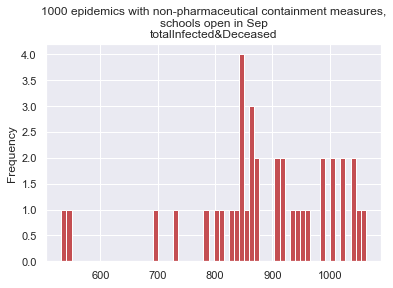

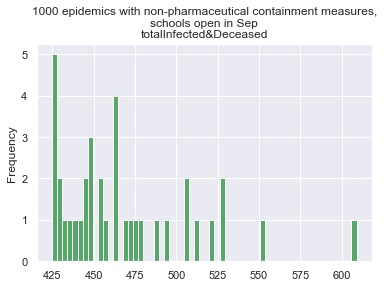

With 60 bins, the max value on z axis is 5.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

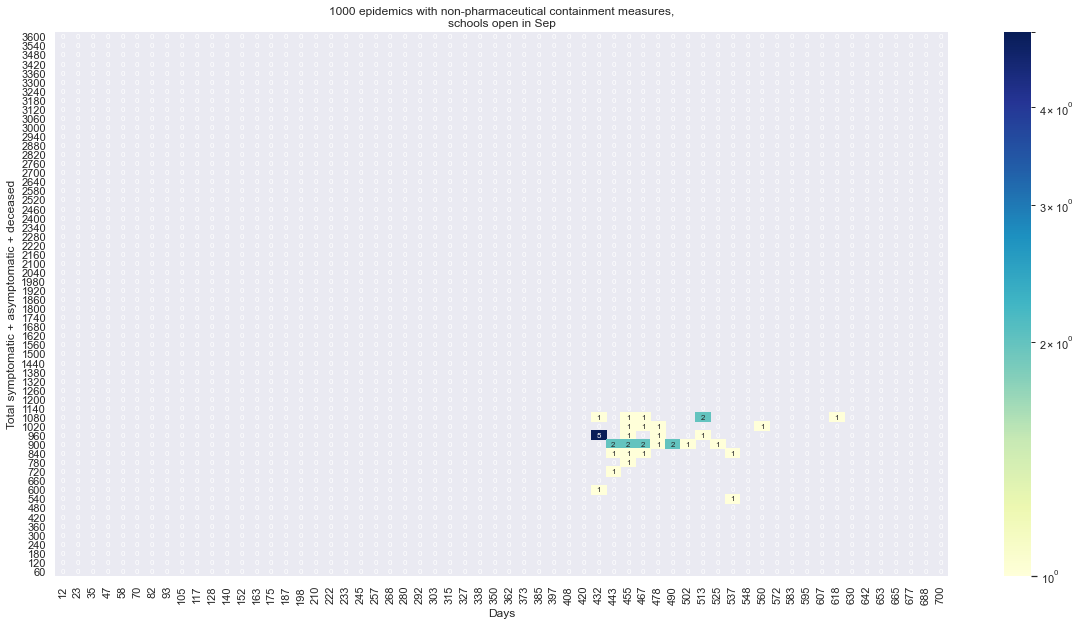

In [23]:
timeFunction(423,1000,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 0 days (2020-02-03) and 87 days (2020-04-30)

,symptomatic,totalInfected&Deceased,duration
count,351.00,351.00,351.00
mean,6.21,13.86,65.78
std,7.57,11.97,19.86
min,0.00,2.00,23.00
25%,2.00,6.00,56.00
50%,4.00,10.00,73.00
75%,6.00,18.00,81.00
max,58.00,87.00,87.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       351.00 &                  351.00 &    351.00 \\
mean  &         6.21 &                   13.86 &     65.78 \\
std   &         7.57 &                   11.97 &     19.86 \\
min   &         0.00 &                    2.00 &     23.00 \\
25\%   &         2.00 &                    6.00 &     56.00 \\
50\%   &         4.00 &                   10.00 &     73.00 \\
75\%   &         6.00 &                   18.00 &     81.00 \\
max   &        58.00 &                   87.00 &     87.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 87 days (2020-04-30), with 10 bins

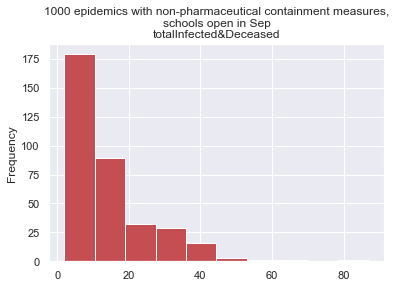

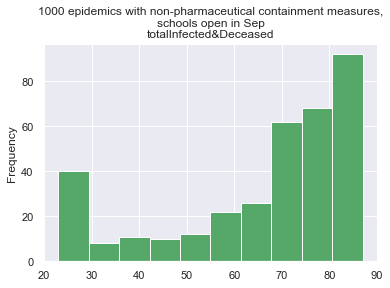

With 10 bins, the max value on z axis is 204.0, first row [147. 204.   0.   0.   0.   0.   0.   0.   0.   0.]

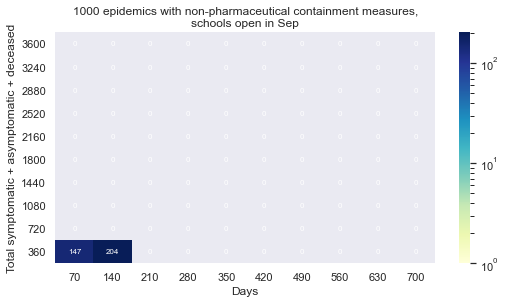

## Epidemics with duration between 0 days (2020-02-03) and 87 days (2020-04-30), with 20 bins

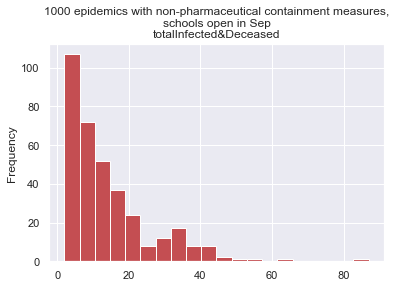

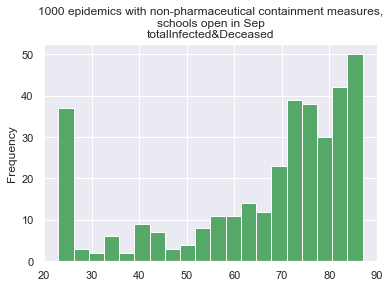

With 20 bins, the max value on z axis is 204.0, first row [ 45. 102. 204.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]

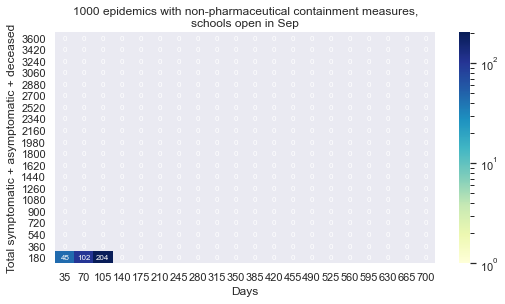

## Epidemics with duration between 0 days (2020-02-03) and 87 days (2020-04-30), with 30 bins

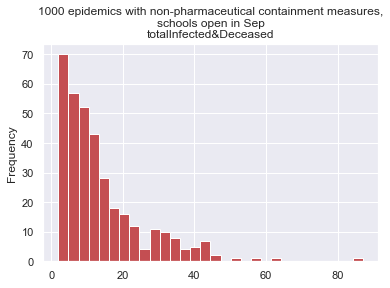

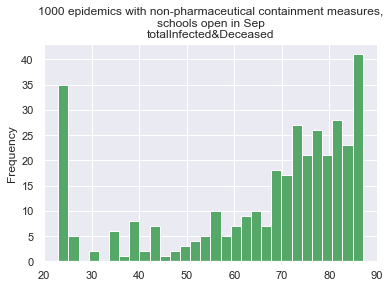

With 30 bins, the max value on z axis is 204.0, first row [ 31.  36.  80. 204.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]

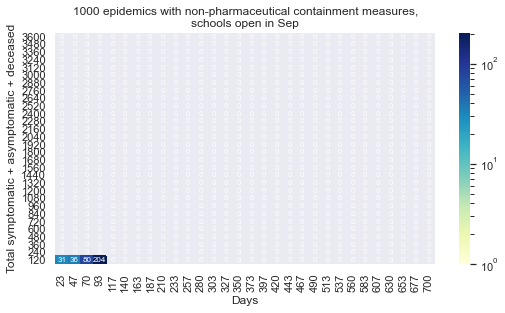

## Epidemics with duration between 0 days (2020-02-03) and 87 days (2020-04-30), with 60 bins

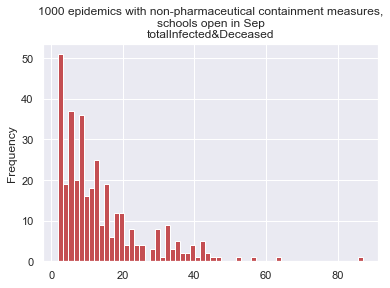

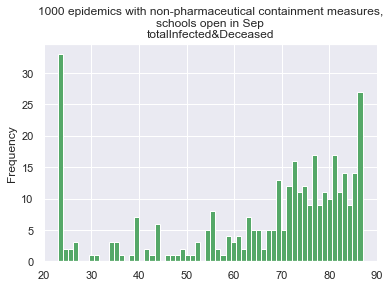

With 60 bins, the max value on z axis is 128.0, first row [  0.  31.  14.  22.  25.  55. 128.  74.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.]

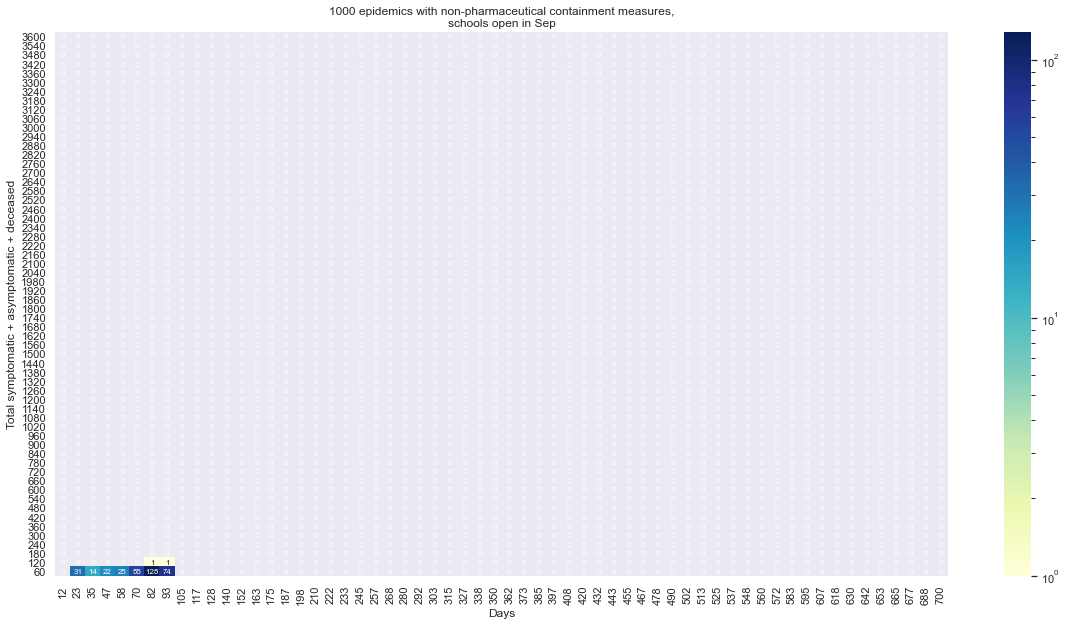

In [24]:
timeFunction(0,87,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 88 days (2020-05-01) and 148 days (2020-06-30)

,symptomatic,totalInfected&Deceased,duration
count,346.00,346.00,346.00
mean,21.29,43.03,108.14
std,19.66,37.12,15.53
min,1.00,6.00,88.00
25%,7.00,18.00,94.00
50%,15.00,33.00,106.00
75%,30.00,54.00,118.00
max,125.00,252.00,148.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       346.00 &                  346.00 &    346.00 \\
mean  &        21.29 &                   43.03 &    108.14 \\
std   &        19.66 &                   37.12 &     15.53 \\
min   &         1.00 &                    6.00 &     88.00 \\
25\%   &         7.00 &                   18.00 &     94.00 \\
50\%   &        15.00 &                   33.00 &    106.00 \\
75\%   &        30.00 &                   54.00 &    118.00 \\
max   &       125.00 &                  252.00 &    148.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 88 days (2020-05-01) and 148 days (2020-06-30), with 10 bins

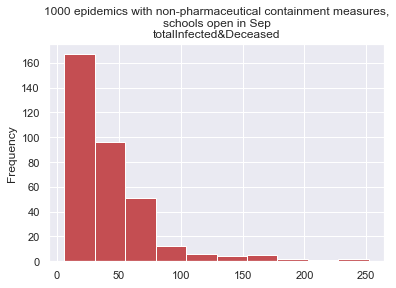

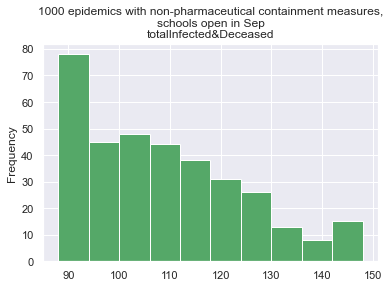

With 10 bins, the max value on z axis is 330.0, first row [  0. 330.  16.   0.   0.   0.   0.   0.   0.   0.]

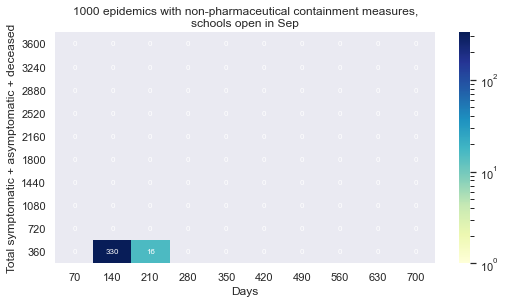

## Epidemics with duration between 88 days (2020-05-01) and 148 days (2020-06-30), with 20 bins

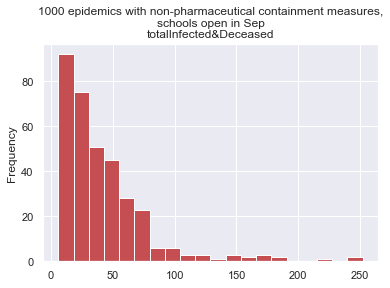

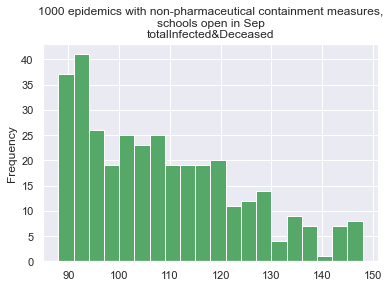

With 20 bins, the max value on z axis is 165.0, first row [  0.   0. 165. 160.  16.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]

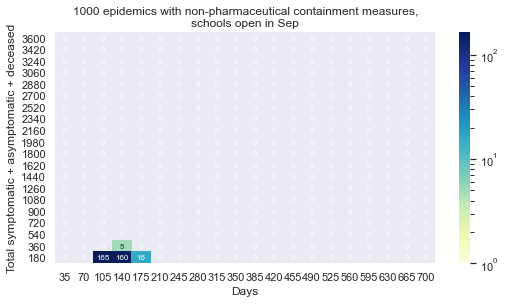

## Epidemics with duration between 88 days (2020-05-01) and 148 days (2020-06-30), with 30 bins

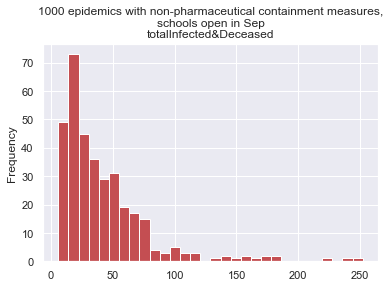

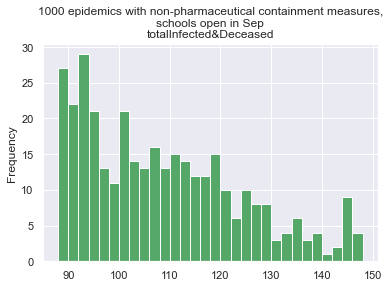

With 30 bins, the max value on z axis is 168.0, first row [  0.   0.   0.  78. 168.  72.  13.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]

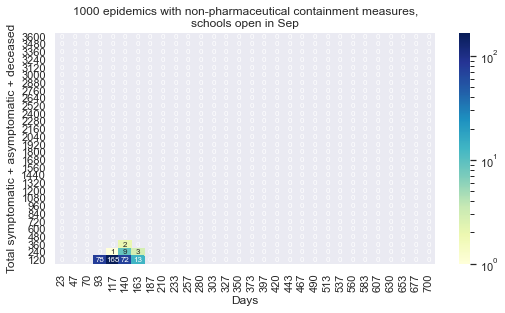

## Epidemics with duration between 88 days (2020-05-01) and 148 days (2020-06-30), with 60 bins

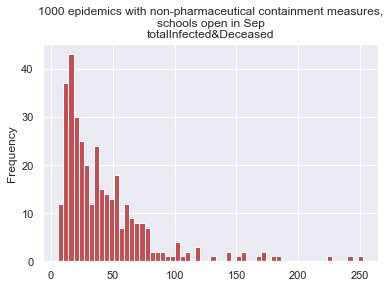

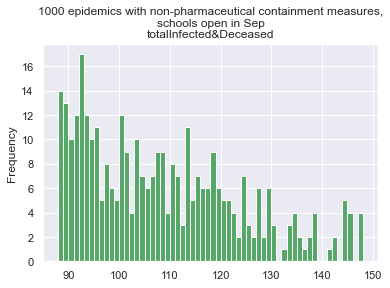

With 60 bins, the max value on z axis is 79.0, first row [ 0.  0.  0.  0.  0.  0.  0. 74. 79. 61. 36. 11.  9.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]

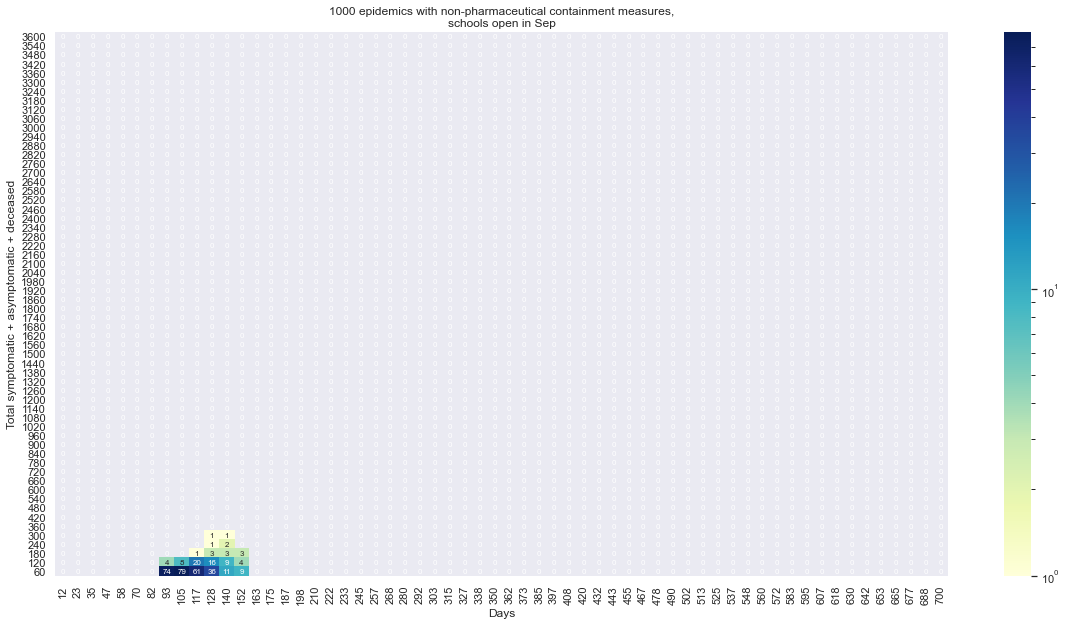

In [25]:
timeFunction(88,148,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 149 days (2020-07-01) and 1000 days (2022-10-30)

,symptomatic,totalInfected&Deceased,duration
count,303.00,303.00,303.00
mean,185.62,585.25,310.73
std,97.75,322.50,95.30
min,6.00,16.00,150.00
25%,90.50,258.00,251.50
50%,208.00,701.00,317.00
75%,264.50,854.50,372.00
max,377.00,1107.00,609.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       303.00 &                  303.00 &    303.00 \\
mean  &       185.62 &                  585.25 &    310.73 \\
std   &        97.75 &                  322.50 &     95.30 \\
min   &         6.00 &                   16.00 &    150.00 \\
25\%   &        90.50 &                  258.00 &    251.50 \\
50\%   &       208.00 &                  701.00 &    317.00 \\
75\%   &       264.50 &                  854.50 &    372.00 \\
max   &       377.00 &                 1107.00 &    609.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 149 days (2020-07-01) and 1000 days (2022-10-30), with 10 bins

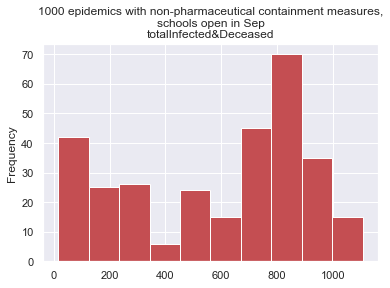

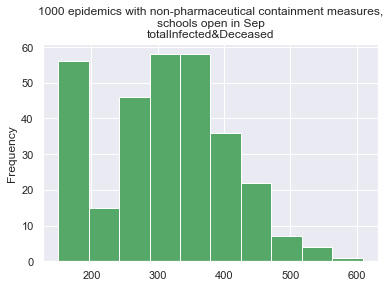

With 10 bins, the max value on z axis is 58.0, first row [ 0.  0. 58. 28.  8.  0.  0.  0.  0.  0.]

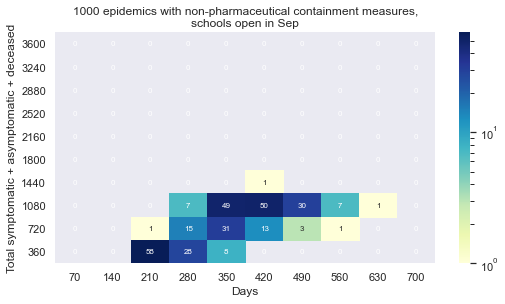

## Epidemics with duration between 149 days (2020-07-01) and 1000 days (2022-10-30), with 20 bins

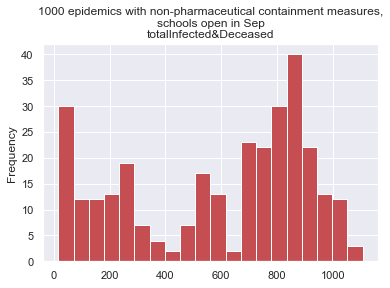

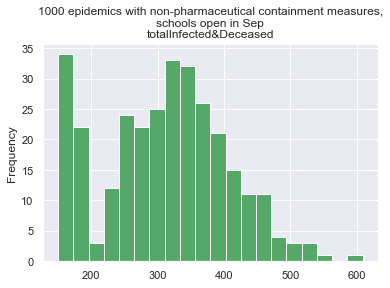

With 20 bins, the max value on z axis is 29.0, first row [ 0.  0.  0.  0. 29. 12.  6.  6.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]

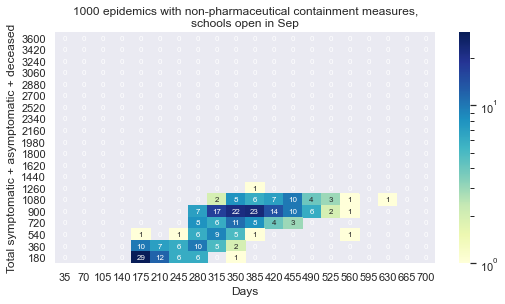

## Epidemics with duration between 149 days (2020-07-01) and 1000 days (2022-10-30), with 30 bins

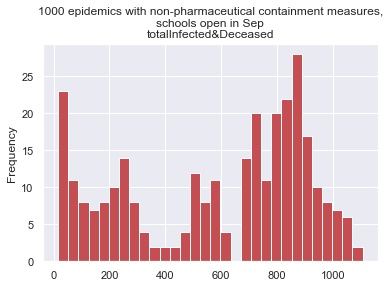

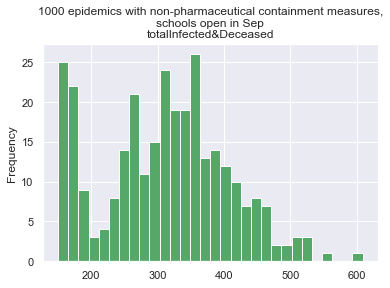

With 30 bins, the max value on z axis is 17.0, first row [ 0.  0.  0.  0.  0.  0. 17. 16.  2.  3.  4.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

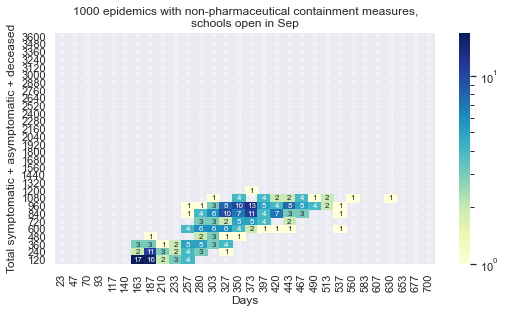

## Epidemics with duration between 149 days (2020-07-01) and 1000 days (2022-10-30), with 60 bins

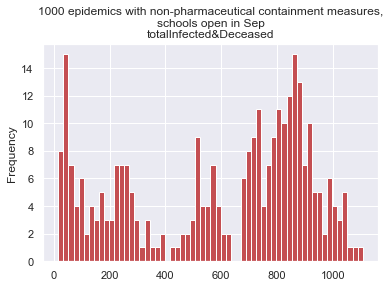

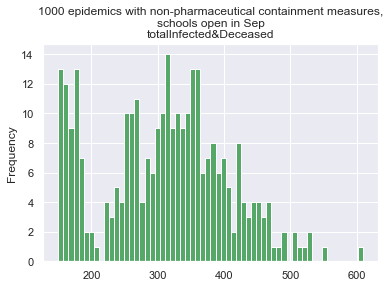

With 60 bins, the max value on z axis is 9.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 9. 5. 4. 2. 0. 0. 1. 0. 3. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

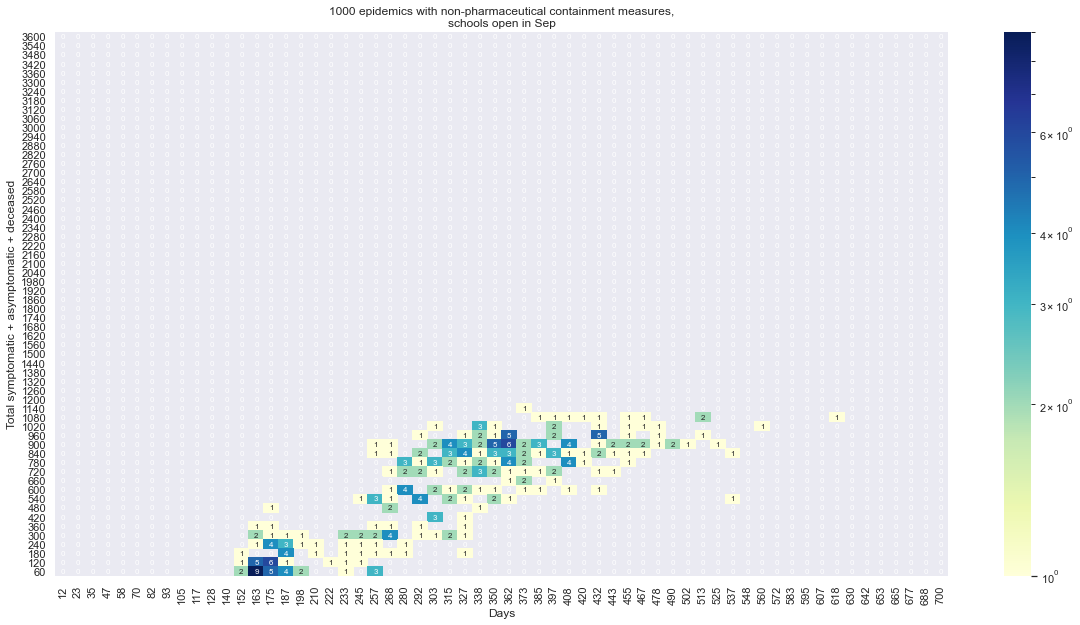

In [26]:
timeFunction(149,1000,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')